In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import covasim as cv
from pyvis.network import Network
import json
from networkx.readwrite import json_graph
cv.options(jupyter=True, verbose=0)

Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


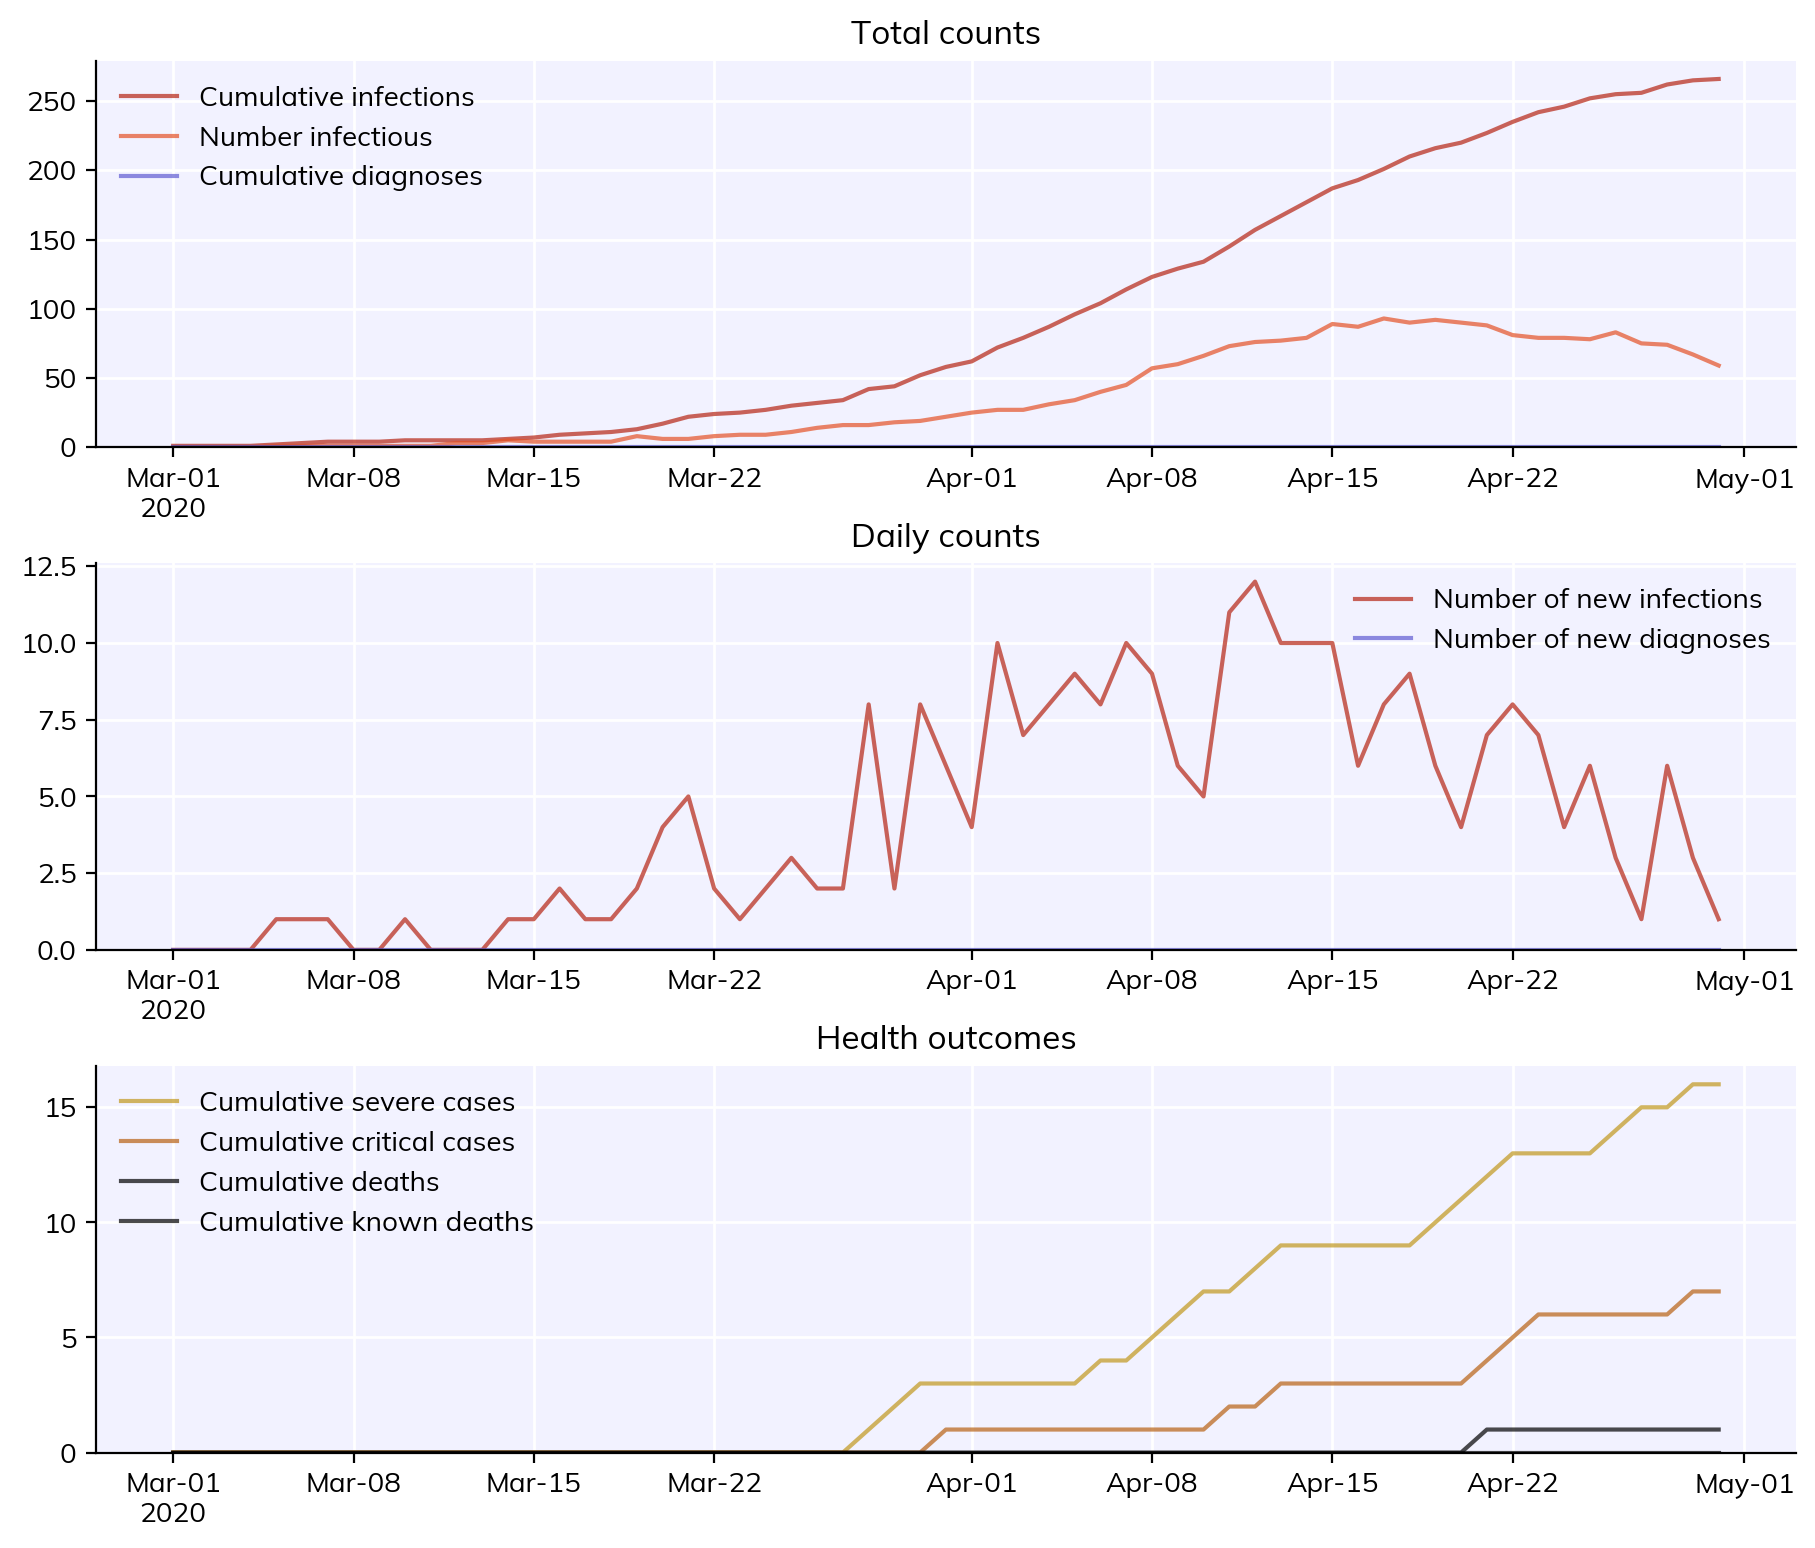

In [2]:
# Set up and run simulation

sim = cv.Sim(pop_size=250, pop_infected=1)
sim.run()
sim.plot()

In [3]:
# Create infection tree

G = nx.DiGraph()
first_infected = sim.people.infection_log[0]['target']
print(first_infected)
G.add_node(first_infected)
for infection in sim.people.infection_log:
    source = infection['source']
    target = infection['target']
    if source != None and target != first_infected:
        if not G.has_edge(target, source):
            if not G.has_node(target):
                G.add_edge(source, target)
            elif G.in_degree(target) == 0:
                G.add_edge(source, target)
G = nx.relabel_nodes(G, lambda x: int(x)) 
print(G.number_of_nodes())


67
231


In [4]:
# set status of all nodes for visualizing severity of cases

sev = []
crit = []
dead = []
id = 0
for i in sim.people.severe:
    if i:
        sev.append(id)
    id+=1
id = 0
for i in sim.people.critical:
    if i:
        crit.append(id)
    id+=1
id = 0
for i in sim.people.dead:
    if i:
        dead.append(id)
    id+=1
print(sev)
print(crit)
print(dead)
for i in G.nodes:
    G.nodes[i]['status'] = 'inf'
    if i in sev:
        G.nodes[i]['status'] = 'sev'
    if i in crit:
        G.nodes[i]['status'] = 'crit'
    if i in dead:
        G.nodes[i]['status'] = 'dead'
        

[3, 61, 84, 106, 151, 168, 196]
[3, 61, 151, 168, 196]
[132]


In [5]:
print(first_infected)

67


In [6]:
# Save tree as json

G_json = json_graph.node_link_data(G)
with open("inf_tree.json", "w") as f:
    json.dump(G_json, f, indent=4)

c:\Users\ptsef\OneDrive\Desktop\MedInfProject\med_proj\Lib\site-packages\networkx\readwrite\json_graph\node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [12]:
# Create graph with pyviz

G.nodes[first_infected]['size'] = 25
G.nodes[first_infected]['color'] = 'red'

net = Network(notebook=True, directed=True)
net.from_nx(G)
net.show("tree.html")

tree.html
